## Least Absolute Shrinkage and Selection Operator (LASSO)

LASSO is a regularized version of linear regression that includes a penalty term into its optimization objective. In summary, it minimizes Ordinary least squares (minimizing the sum of squared residuals) while shrinking the model's coeficients towards 0.

This model is great for feature selection as it shrinks unimportant features to 0, creating a sparse feature set.

The optimization objective is the following:

`minimize => (1/n)*sum((y-yhat)**2) + alpha * sum(abs(coef))`

In [203]:
import numpy as np
import matplotlib.pyplot as plt

In [204]:
sample_size = 100
useful_feat = np.random.randn(sample_size, 1)
reduant_feat = np.random.randn(sample_size, 1)

X = np.concatenate([useful_feat, reduant_feat, np.ones((sample_size, 1))], axis=1)
noise = np.random.randn(X.shape[0])
noise_strength = 0.3

w = np.array([6, 0, 1])

y = X[:, 0]*w[0] + w[2] + noise*noise_strength
y = np.reshape(y, newshape=(-1, 1))

print(X.shape)
print(y.shape)


(100, 3)
(100, 1)


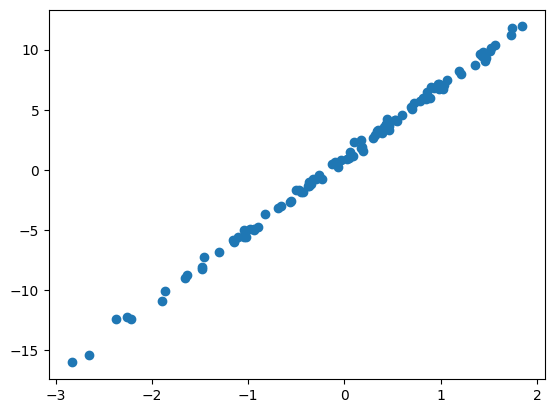

In [205]:
plt.scatter(X[:, 0], y)

In [206]:
class LASSO:

    def __init__(self, alpha, lr, epochs):
        
        self.alpha = alpha
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.soft_thresh = alpha*lr

    def det_deriv(self, theta):

        # if theta < 0: This way causes the model to 'bounce' around zero

        #     return -1
        # elif theta > 0:
        #     return 1
        # else: 
        #     return 0

        if theta < -self.soft_thresh:

            return theta + self.soft_thresh

        elif theta > self.soft_thresh:

            return theta - self.soft_thresh

        else:

            return 0


    
    def fit(self, X, y):
        
        self.w = np.random.randn(X.shape[1], 1)

        for epoch in range(self.epochs):

            gradient = (-2/X.shape[0]) * X.T @ (y-(X@self.w)) + self.alpha*np.vectorize(self.det_deriv, otypes=[float])(self.w)

            self.w -= self.lr*gradient
    
    def predict(self, X):

        return X @ self.w
    
    

        

In [207]:
lasso = LASSO(0.1, 0.1, 20)
lasso.fit(X, y)
lasso.w

array([[ 5.69722281],
       [-0.10685275],
       [ 0.88794524]])

Lasso Regression Weights:
 [[ 5.69722281]
 [-0.10685275]
 [ 0.88794524]]


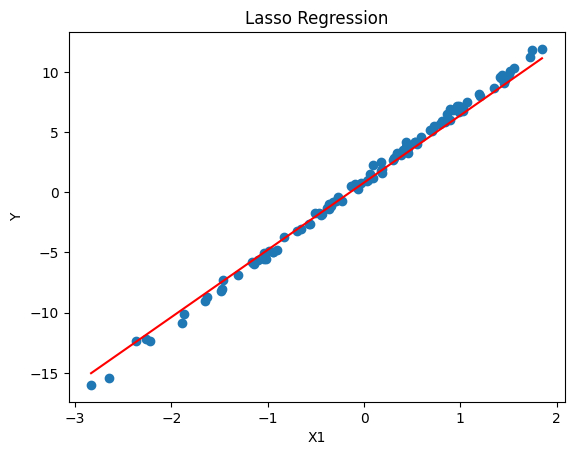

In [208]:
linspace_1 = np.reshape(np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0]), newshape=(-1,1))
linspace_2 = np.reshape(np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0]), newshape=(-1,1))

x_lasso = np.concatenate([linspace_1,linspace_2, np.ones((X.shape[0], 1))], axis=1)


plt.scatter(X[:, 0], y)
plt.plot(x_lasso[:, 0], lasso.predict(x_lasso), c="r")
plt.xlabel("X1")
plt.ylabel("Y")
plt.title("Lasso Regression")
print(f"Lasso Regression Weights:\n {lasso.w}")

True Param 0: 6
True Param 1: 0
True Param 2: 1


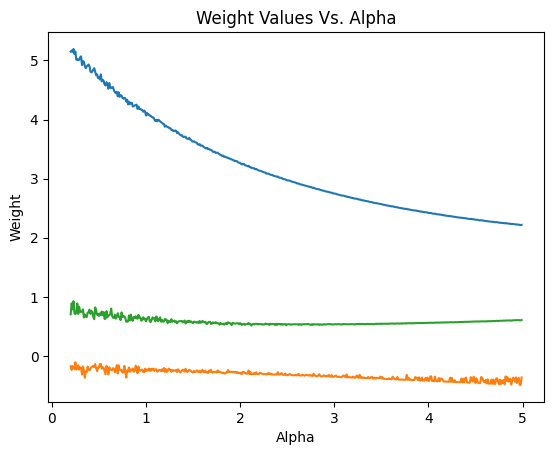

In [209]:
params_vals = []

lr, epochs = 0.1, 10

alpha_vals = np.arange(0.2, 5, 0.01)

for alpha in alpha_vals:

    lasso = LASSO(alpha, lr, epochs)

    lasso.fit(X, y)

    params_vals.append(lasso.w.copy())

params_vals = np.reshape(np.array(params_vals), (-1, X.shape[1]))

for i in range(X.shape[1]):

    plt.plot(alpha_vals, params_vals[:, i])

plt.xlabel("Alpha")
plt.ylabel("Weight")
plt.title("Weight Values Vs. Alpha")

for i in range(len(w)):

    print(f"True Param {i}: {w[i]}")
